In [164]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
drugdf = pd.read_csv("Data/mouse_drug_data.csv")
trialdf = pd.read_csv("Data/clinicaltrial_data.csv")

# Combine the data into a single dataset
finaldf=pd.merge(drugdf,trialdf,how="left",on=["Mouse ID"])

# Display the data table for preview
finaldf.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [165]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumorvolume=finaldf.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
meantumorvolume = pd.DataFrame(meantumorvolume).reset_index()

# Preview DataFrame
meantumorvolume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [166]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror=finaldf.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
stderror= pd.DataFrame(stderror).reset_index()
# Preview DataFrame
stderror.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [167]:
# Minor Data Munging to Re-Format the Data Frames
Reformat=meantumorvolume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
Reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


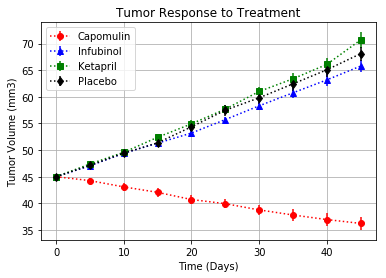

In [168]:
# Generate the Plot (with Error Bars)
Reformatstderr=stderror.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotStyleDict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

fig1, ax1 = plt.subplots()
for drug in drugList:
    ax1.errorbar(Reformat.index, Reformat[drug], Reformatstderr[drug], fmt = plotStyleDict[drug])
ax1.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')


# Save the Figure
plt.savefig("TumorResponseToTreatment.png")
plt.show()

In [169]:
# Store the Mean Metastatic Sites  Data Grouped by Drug and Timepoint 
meanmsites=finaldf.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
meanmsites = pd.DataFrame(meanmsites).reset_index()
# Preview DataFrame
meanmsites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [170]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
serrmet=finaldf.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
serrmet = pd.DataFrame(serrmet).reset_index()
# Preview DataFrame
serrmet.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [171]:
# Minor Data Munging to Re-Format the Data Frames
Reformatm=meanmsites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
Reformatm


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


<function matplotlib.pyplot.show(*args, **kw)>

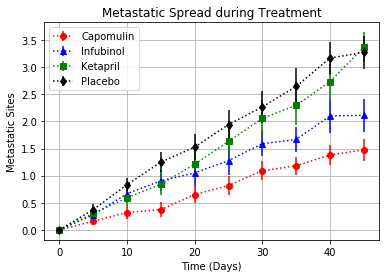

In [172]:

Reformatsemet = serrmet.pivot(index= 'Timepoint', columns="Drug", values="Metastatic Sites")
# Generate the Plot (with Error Bars)


fig2, ax2 = plt.subplots()
for drug in drugList:
    ax2.errorbar(Reformatm.index, Reformatm[drug],
             Reformatsemet[drug], fmt=plotStyleDict[drug])

ax2.legend()
plt.grid(True)
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show

In [173]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=finaldf.groupby(["Drug","Timepoint"])['Mouse ID'].count()
# Convert to DataFrame
micecount = pd.DataFrame(micecount).reset_index()
# Preview DataFrame
micecount.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [174]:

# Minor Data Munging to Re-Format the Data Frames
Reformatmicect = micecount.pivot (index = "Timepoint", columns="Drug", values="Mouse ID")
# Preview the Data Frame
Reformatmicect

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


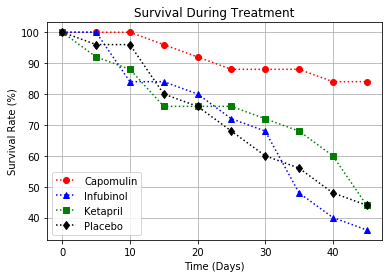

In [175]:
# Generate the Plot (for percentages)
mouseSurvivalRate = pd.DataFrame()
for col in Reformatmicect.columns:
    mouseSurvivalRate[col] = 100 * Reformatmicect[col]/25

fig3, ax3 = plt.subplots()
for drug in drugList:
    plt.plot(mouseSurvivalRate.index, mouseSurvivalRate[drug], plotStyleDict[drug])
plt.grid(True)
ax3.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()

In [180]:
percentchange = (Reformat.iloc[9, :] - Reformat.iloc[0,:])/Reformat.iloc[0,:] * 100
percentChange = percentchange.to_frame()
percentChange = percentChange.rename(columns = {0 : "Percent Change"})
percentChange["Pass"] = (percentChange < 0)

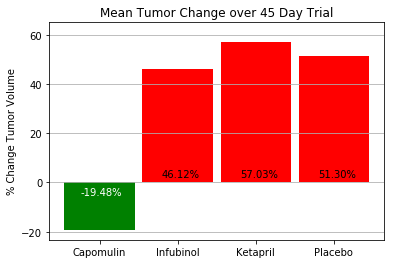

In [181]:
fig4, ax4 = plt.subplots()
x = 0

for drug in drugList:
    y = percentChange.loc[drug, "Percent Change"]
    if percentChange.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
plt.title("Mean Tumor Change over 45 Day Trial")
plt.ylabel("% Change Tumor Volume")
plt.ylim(ymax = 65)

plt.savefig("MeanTumorChange.png")

plt.show()